In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [20]:
rfm = pd.read_csv("/content/view.php.csv")


In [21]:
data=rfm.iloc[:,0:3]
print(data)
# data.describe()
rfm.describe()

     Recency  Frequency  Monetary
0         34         12      5215
1         15          7      2674
2          7         14      5971
3         65         13      5735
4          0         10      5329
..       ...        ...       ...
994       92         12      3798
995       11         14      5128
996        4         16      8096
997       14         12      4750
998       13         11      4670

[999 rows x 3 columns]


,Recency,Frequency,Monetary
count,999.000000,999.00000,999.000000
mean,35.307307,10.01001,5027.259259
std,36.555619,3.12529,1781.872387
min,-1.000000,2.00000,591.000000
25%,10.000000,8.00000,3753.500000
50%,24.000000,10.00000,4895.000000
75%,50.000000,12.00000,6099.000000
max,256.000000,21.00000,12972.000000


In [22]:
#最大值最小值正規化
#並轉換到0~1的範圍
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
df_minmax=scaler.fit_transform(rfm.to_numpy())
df_minmax

array([[0.13618677, 0.52631579, 0.37347549],
       [0.06225681, 0.26315789, 0.16824166],
       [0.0311284 , 0.63157895, 0.43453679],
       ...,
       [0.01945525, 0.73684211, 0.60617075],
       [0.05836576, 0.52631579, 0.33591794],
       [0.05447471, 0.47368421, 0.32945643]])

In [24]:
#change array to datafram and rename the column to R,F,M

df_minmax = pd.DataFrame(df_minmax,columns=['R','F','M'])
df_minmax

,R,F,M
0,0.136187,0.526316,0.373475
1,0.062257,0.263158,0.168242
2,0.031128,0.631579,0.434537
3,0.256809,0.578947,0.415475
4,0.003891,0.421053,0.382683
...,...,...,...
994,0.361868,0.526316,0.259026
995,0.046693,0.631579,0.366449
996,0.019455,0.736842,0.606171
997,0.058366,0.526316,0.335918


In [25]:
model_KMC = KMeans(n_clusters = 4,max_iter=500, random_state = 42)

In [26]:
model_KMC.fit_predict(df_minmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 1, 0, 0, 1, 0, 3, 0, 2, 0, 0, 1, 0, 1, 0, 3, 0, 2, 0, 0, 3,
       1, 0, 0, 2, 1, 1, 0, 3, 3, 1, 0, 0, 1, 0, 3, 3, 3, 3, 3, 0, 0, 0,
       1, 0, 3, 3, 0, 2, 2, 3, 3, 3, 1, 2, 2, 0, 3, 0, 3, 0, 0, 0, 3, 2,
       2, 2, 3, 1, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 1, 3, 1, 0, 0, 0, 1,
       3, 0, 3, 3, 0, 2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3,
       3, 0, 1, 3, 3, 3, 3, 2, 0, 3, 0, 0, 1, 1, 0, 1, 0, 1, 0, 3, 3, 3,
       1, 0, 0, 3, 3, 2, 0, 3, 0, 0, 0, 1, 1, 0, 3, 0, 0, 2, 0, 2, 3, 0,
       3, 0, 0, 3, 1, 0, 3, 3, 0, 3, 1, 3, 2, 0, 3, 0, 3, 3, 1, 3, 3, 0,
       3, 0, 1, 3, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 3, 0, 0, 0, 3, 1, 0, 1,
       3, 3, 3, 3, 2, 3, 2, 0, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 0, 0, 3, 3,
       0, 3, 2, 3, 0, 1, 3, 3, 3, 2, 2, 0, 0, 2, 0, 0, 0, 3, 0, 3, 0, 2,
       0, 3, 3, 0, 0, 0, 1, 0, 0, 2, 3, 3, 1, 1, 0, 3, 0, 2, 1, 3, 3, 0,
       3, 1, 0, 2, 0, 3, 3, 0, 0, 1, 1, 3, 0, 0, 1, 0, 2, 3, 3, 0, 2, 1,
       2, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0,

In [27]:
#將資料分群並顯示每一組資料數量

r1 = pd.Series(model_KMC.labels_).value_counts()
r1

0    384
3    313
1    163
2    139
dtype: int64

In [28]:
#顯示每一群資料的中心座標

r2 = pd.DataFrame(model_KMC.cluster_centers_)
r2

,0,1,2
0,0.106680,0.476151,0.398529
1,0.085341,0.672909,0.582037
2,0.410548,0.277925,0.252749
3,0.093261,0.287540,0.239343


In [29]:
#將兩個圖表合併

r21 = pd.concat([r2,r1],axis = 1)
r21

,0,1,2,0
0,0.106680,0.476151,0.398529,384
1,0.085341,0.672909,0.582037,163
2,0.410548,0.277925,0.252749,139
3,0.093261,0.287540,0.239343,313


In [30]:
#change the column name to R,F,M and GroupSize

r21.columns = list(df_minmax.columns) + ['GroupSize']
r21

,R,F,M,GroupSize
0,0.106680,0.476151,0.398529,384
1,0.085341,0.672909,0.582037,163
2,0.410548,0.277925,0.252749,139
3,0.093261,0.287540,0.239343,313


In [31]:
#將分群結果合併至原始原始已標準化資料，並顯示前十筆

df_minmax["TeamID"]=model_KMC.labels_

#在下面這行前面打＃可以看到所有已經標準化的資料
df_minmax.head(10)


,R,F,M,TeamID
0,0.136187,0.526316,0.373475,0
1,0.062257,0.263158,0.168242,3
2,0.031128,0.631579,0.434537,1
3,0.256809,0.578947,0.415475,0
4,0.003891,0.421053,0.382683,0
5,0.062257,0.789474,0.676924,1
6,0.062257,0.473684,0.337695,0
7,0.155642,0.263158,0.200065,3
8,0.198444,0.315789,0.422421,0
9,0.696498,0.315789,0.363702,2


In [45]:
#將分群後的編號資料填入ＲＦＭ表格中

rfm["k-means"] = model_KMC.labels_
rfm

#在下面這行前面打＃可以看到所有ＲＦＭ資料
rfm.head(10)


,Recency,Frequency,Monetary,k-means
0,34,12,5215,0
1,15,7,2674,3
2,7,14,5971,1
3,65,13,5735,0
4,0,10,5329,0
5,15,17,8972,1
6,15,11,4772,0
7,39,7,3068,3
8,50,8,5821,0
9,178,8,5094,2


In [33]:
#輸出ＲＦＭ表格

rfm.to_csv("rfm_KMC_Output.csv",index = False)

In [34]:
# from google.colab import drive
# drive.mount('/content/drive')

<function matplotlib.pyplot.show(close=None, block=None)>

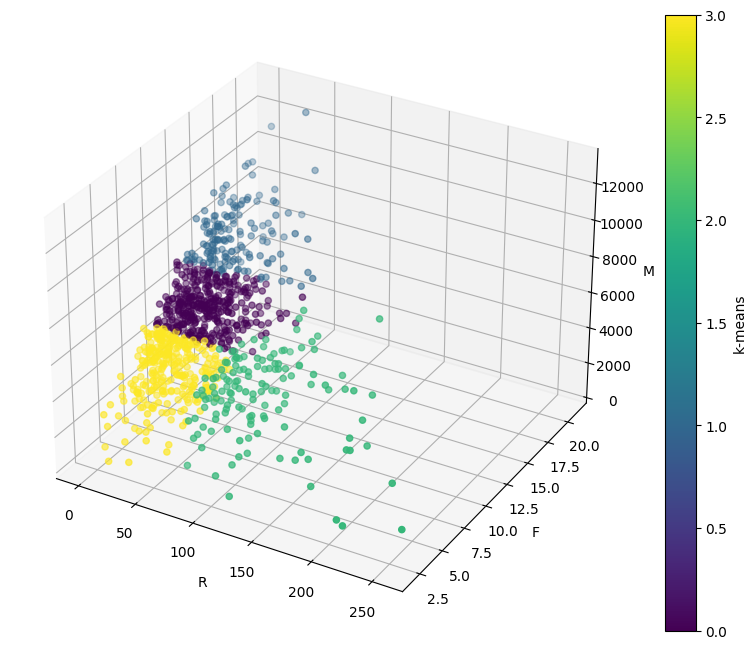

In [35]:
# 3D散佈圖

df = pd.read_csv("rfm_KMC_Output.csv")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection = '3d')
scatter = ax.scatter(df['Recency'],df['Frequency'],df['Monetary'],c=df['k-means'],marker = 'o')

ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

plt.colorbar(scatter,label = 'k-means')

plt.show


In [36]:
# SSE值

SSE=[]
for k in range(2,11):
  est = KMeans(n_clusters = k)
  est.fit(df_minmax)
  SSE.append(est.inertia_)
SSE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[250.139323159602,
 127.3761047148469,
 21.405453717976982,
 19.029425629368284,
 16.92297106951564,
 15.163470450569072,
 13.921604151408363,
 12.53495584728612,
 11.551824783061495]

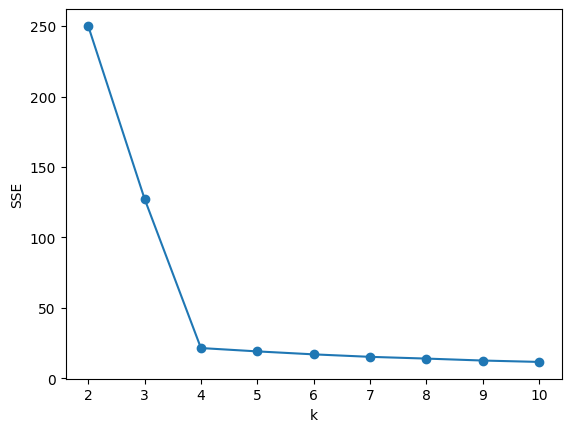

In [37]:
#繪製手肘圖

x = range(2,11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(x,SSE,'o-')

In [38]:
#繪製每一組的ＲＦＭ箱形圖

group=[]
for i in range(4):
  group.append(df_minmax[df_minmax['TeamID'] == int(i)])
  group[i].describe()

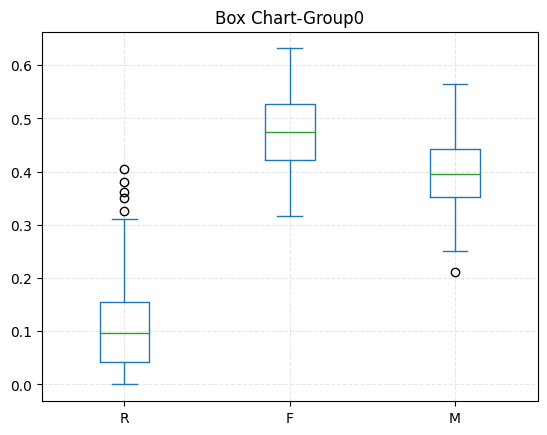

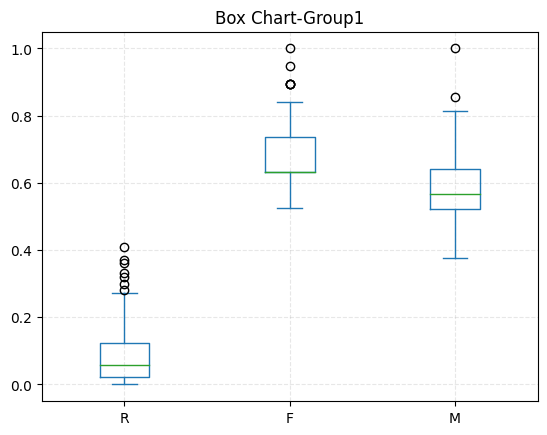

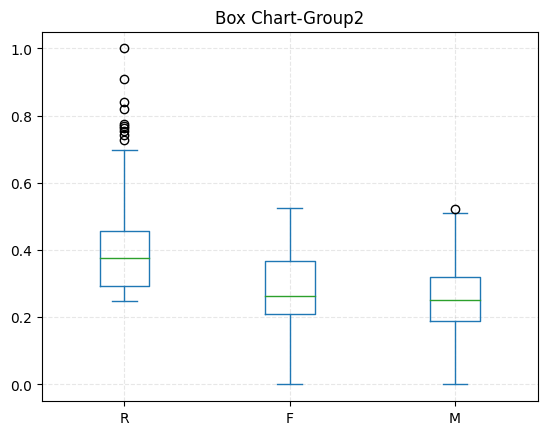

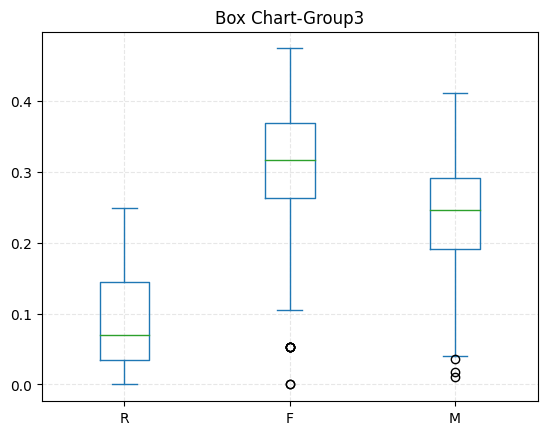

In [39]:
for i in range(4):
  group[i]=group[i][['R','F','M']]
  t="Box Chart-Group"+str(i)
  group[i].plot.box(title=t)
  plt.grid(linestyle = '--',alpha = 0.3)

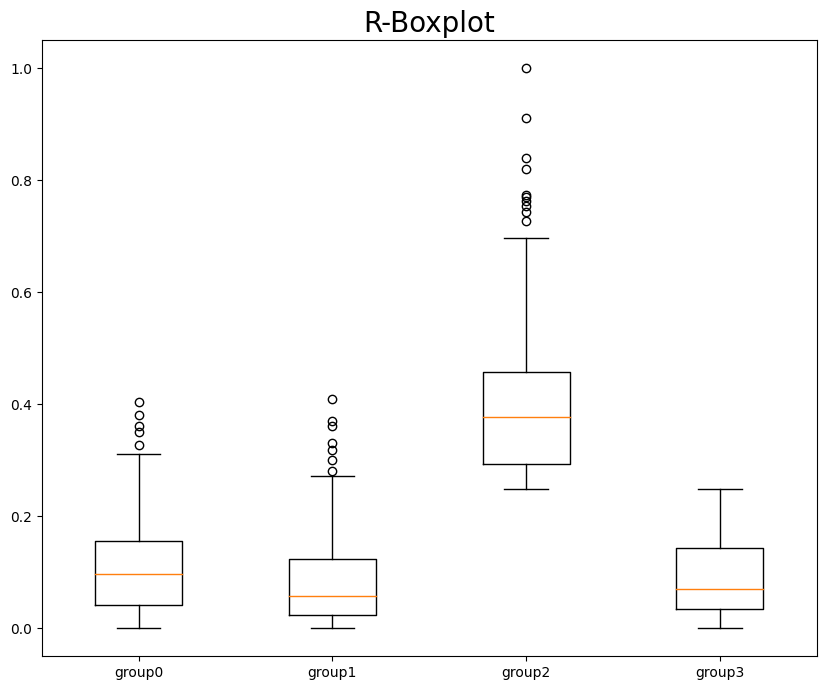

In [40]:
#將所有的Ｒ畫到同一張箱形圖上

plt.figure(figsize = (10,8))
labels="group0","group1","group2","group3"
plt.boxplot([group[0]['R'],group[1]['R'],group[2]['R'],group[3]['R']],labels=labels)
plt.title('R-Boxplot',fontsize=20)

plt.show()

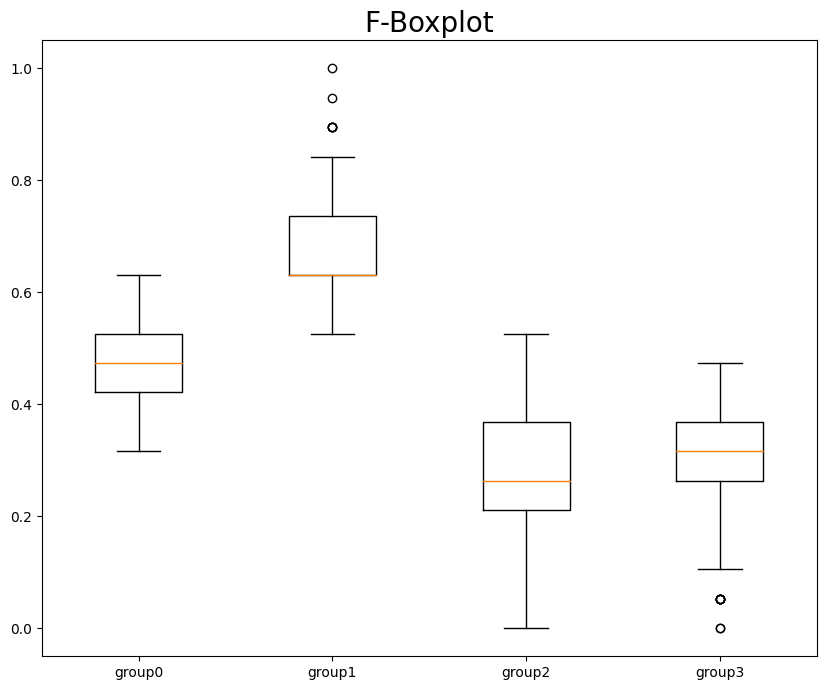

In [41]:
#將所有的Ｆ畫到同一張箱形圖上


plt.figure(figsize = (10,8))
labels="group0","group1","group2","group3"
plt.boxplot([group[0]['F'],group[1]['F'],group[2]['F'],group[3]['F']],labels=labels)
plt.title('F-Boxplot',fontsize=20)

plt.show()

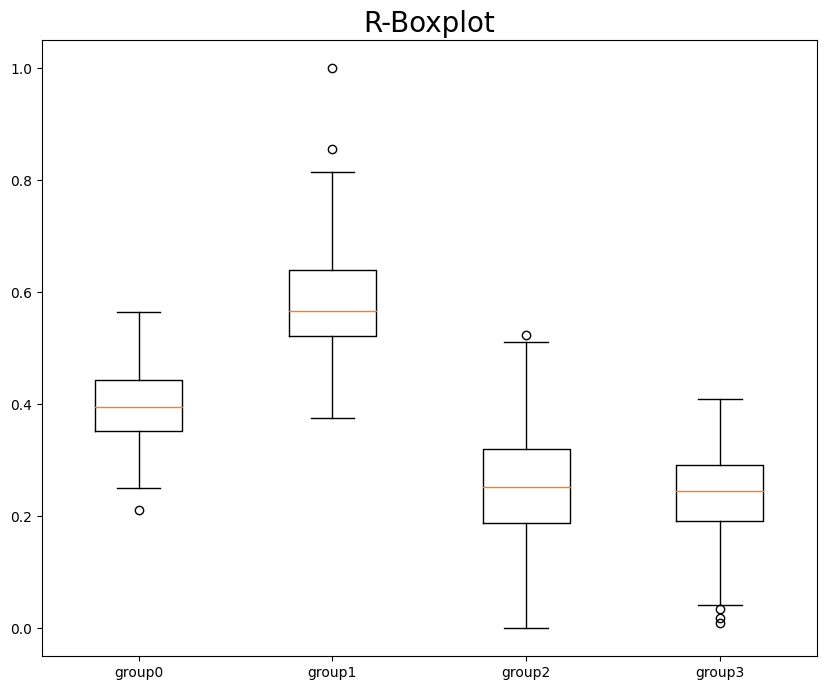

In [42]:
#將所有的M畫到同一張箱形圖上


plt.figure(figsize = (10,8))
labels="group0","group1","group2","group3"
plt.boxplot([group[0]['M'],group[1]['M'],group[2]['M'],group[3]['M']],labels=labels)
plt.title('M-Boxplot',fontsize=20)

plt.show()